In [1]:
#20250305 갸아아악 뭐뭣 22번째 수업이라고 ??? 이건 거짓말이야 믿을 수 없어 !!!!! 갸아아아악

- https://kosis.kr/search/search.do
- 출입국 항구/내외국인/성별 국제이동(연간)
- 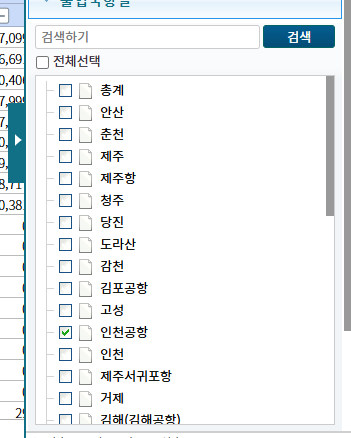

In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

In [7]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)

In [8]:
# csv 파일 임포트
file_path = "./ref/출입국항구내외국인성별국제이동연간.csv"
ori = pd.read_csv(file_path, encoding = "EUC-KR") # 우분투일 때는 utf 파일은 생략 가능~
ori.head()

,항목,내외국인별,출입국항별,시점,성별,데이터
0,입국자,내국인,인천공항,2001,남자,70444
1,입국자,내국인,인천공항,2001,여자,69542
2,입국자,내국인,인천공항,2002,남자,101032
3,입국자,내국인,인천공항,2002,여자,102880
4,입국자,내국인,인천공항,2003,남자,102093


In [9]:
ex1_data = ori.copy()
ex1_data.columns = ["type2","type1","airport","year","gender","value"]
#ex1_data.rename(columns={"",""})  : columns의 항목을 지정해서 바꿔줄 수 있다! 기억할 것.
ex1_data

,type2,type1,airport,year,gender,value
0,입국자,내국인,인천공항,2001,남자,70444
1,입국자,내국인,인천공항,2001,여자,69542
2,입국자,내국인,인천공항,2002,남자,101032
3,입국자,내국인,인천공항,2002,여자,102880
4,입국자,내국인,인천공항,2003,남자,102093
...,...,...,...,...,...,...
179,출국자,외국인,인천공항,2021,여자,112458
180,출국자,외국인,인천공항,2022,남자,124034
181,출국자,외국인,인천공항,2022,여자,106797
182,출국자,외국인,인천공항,2023,남자,148900


In [10]:
# 필터 제작
filter1 = ex1_data['type1']=='외국인'
ex1_data = ex1_data[filter1]
ex2_data = ex1_data.copy()
ex3_data = ex1_data.copy()
ex4_data = ex1_data.copy()

In [11]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex1_data

,year,total
0,2001,181558
1,2002,232592
2,2003,274463
3,2004,273524
4,2005,443726
5,2006,392097
6,2007,376560
7,2008,431044
8,2009,404182
9,2010,418647


In [7]:
ex2_data
# 입국자만 추출하기
filter2 = ex2_data['type2']=='입국자'
ex2_data = ex2_data[filter2]
ex2_data = ex2_data.groupby('year')['value'].sum().reset_index(name="total")
ex2_data

,year,total
0,2001,108662
1,2002,135099
2,2003,140375
3,2004,149826
4,2005,214051
5,2006,246453
6,2007,249330
7,2008,256440
8,2009,202894
9,2010,254870


In [8]:
ex3_data
# 출국자만 추출하기
filter3 = ex3_data['type2']=='출국자'
ex3_data[filter3]
ex3_filtered = ex3_data[filter3]
ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name="total")
ex33_data = ex3_data["total"]

In [12]:
ex4_data
# 외국인 전부
ex4_data = ex4_data.groupby('year')['value'].sum().reset_index(name="total")

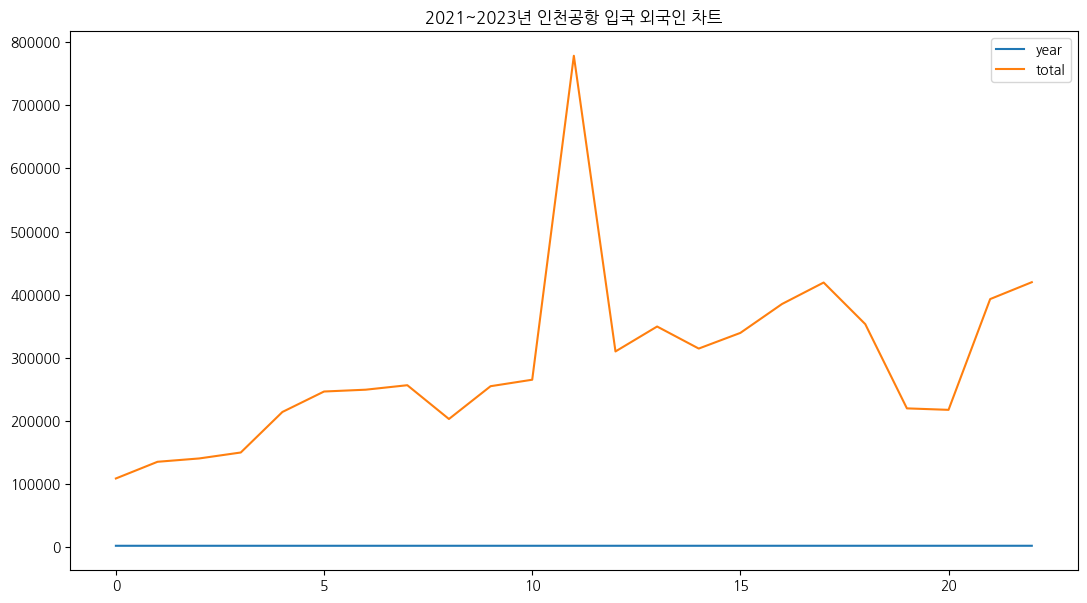

In [13]:
ex2_data.plot(figsize=(13,7), title="2021~2023년 인천공항 입국 외국인 차트")
plt.show()

<Axes: title={'center': '2021~2023년 인천공항 출국 외국인 차트'}>

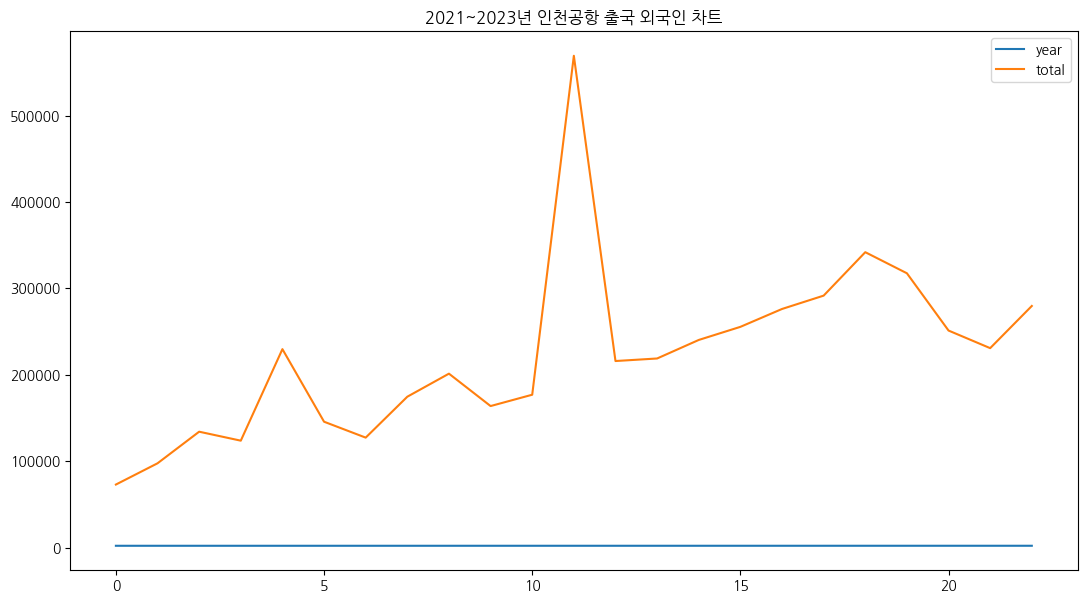

In [14]:
ex3_data.plot(figsize=(13,7), title="2021~2023년 인천공항 출국 외국인 차트")

In [ ]:
#!pip install prophet
#!pip install --upgrade plotly
#!pip install tqdm
#!pip install --upgrade jupyter ipywidgets

In [4]:
from prophet import Prophet

# from .autonotebook import tqdm as notebook_tqdm

In [17]:
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해준다.
ex5_data = ex1_data.copy()
ex5_data['year'] = pd.to_datetime(ex5_data['year'],format="%Y")  # 날짜 형식을 아예 년월일 형식으로 잡아줌!
ex5_data = ex5_data.rename(columns={'year':'ds','total':'y'})
ex5_data.tail()

,ds,y
18,2019-01-01,695161
19,2020-01-01,537264
20,2021-01-01,468611
21,2022-01-01,623765
22,2023-01-01,699357


In [13]:
m= Prophet()
m.fit(ex5_data)  # fit은 트레이닝 시켜주는 것 !

11:38:20 - cmdstanpy - INFO - Chain [1] start processing
11:38:20 - cmdstanpy - INFO - Chain [1] done processing


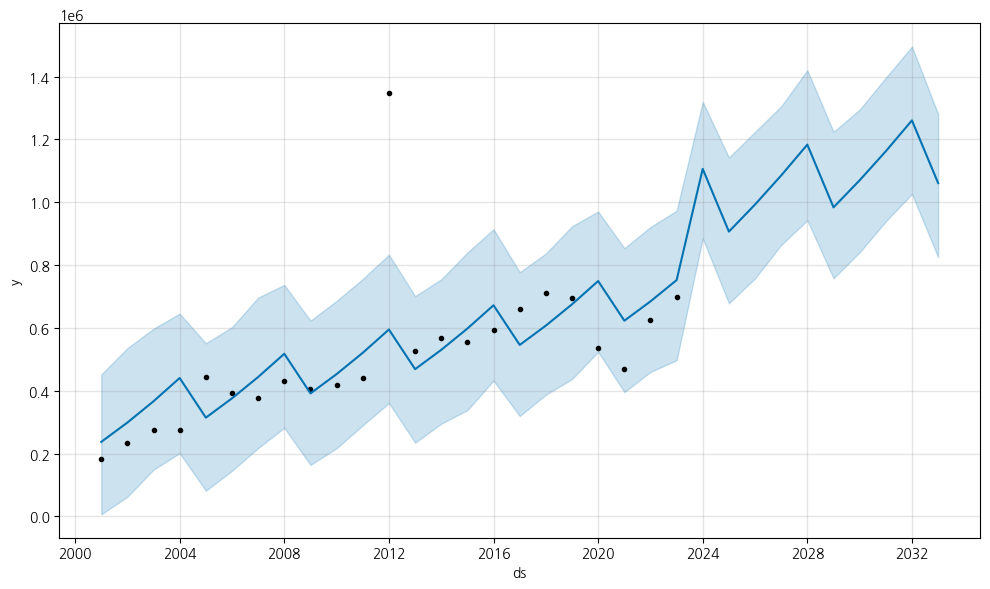

<Figure size 1000x1500 with 0 Axes>

In [14]:
future = m.make_future_dataframe(periods=10,freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)   # fit 한 값을 토대로 predict 하는 것 !!
fig1 = m.plot(forecast)
plt.savefig("./ref/chart/예측.png")
plt.figure(figsize=(10,15))
plt.show()  # 미래를... 예측하는... 그래프 ~~!

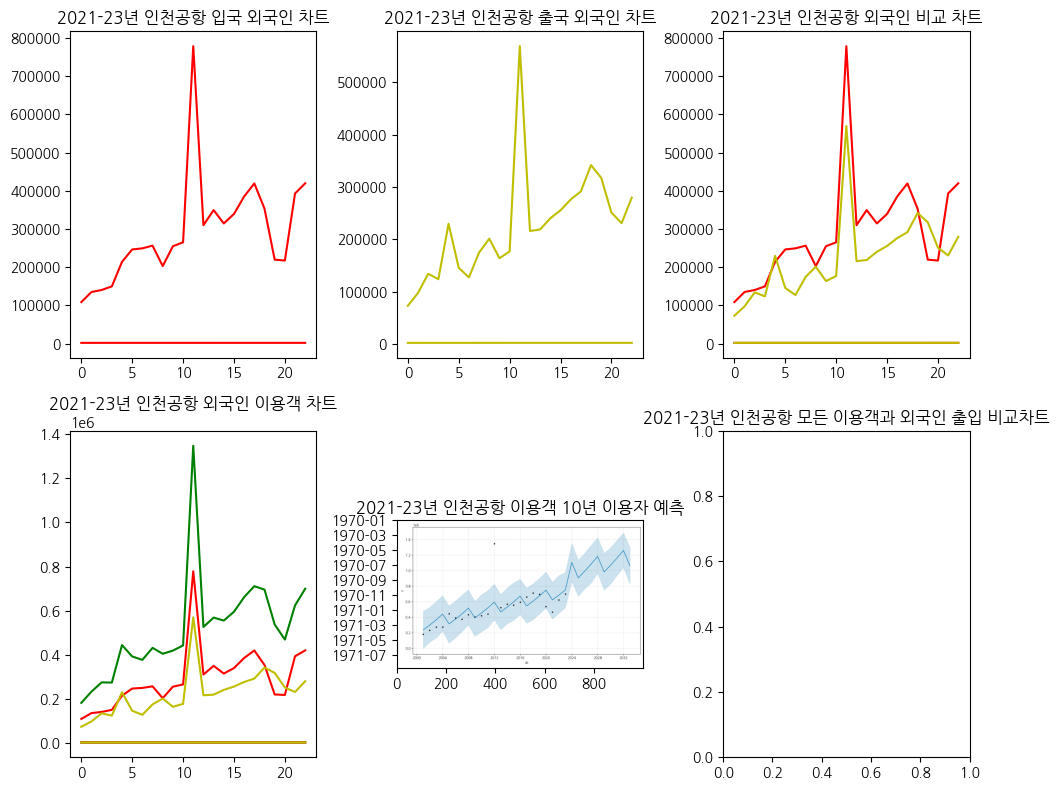

In [26]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,3,figsize=(10,8))  # 2 x 2 서브 플롯 생성 : 4개가 생성된다는 뜻이다~
   # 행렬로 위치를 표현한다고 생각하면 된다 !! ex) axs[0,0]
import matplotlib.image as mpimg
# 이미지 불러오기
img = mpimg.imread("./ref/chart/예측.png")




axs[0,0].plot(ex2_data,color="r")    
axs[0,1].plot(ex3_data,color="y")
axs[0,2].plot(ex2_data,color="r")
axs[0,2].plot(ex3_data,color="y")
axs[1,0].plot(ex4_data,color='g')  # 와진짜차트한번에합쳐지는거알았냐고진짜개멋진기능아니냐??
axs[1,0].plot(ex2_data,color="r")    
axs[1,0].plot(ex3_data,color="y")
axs[1,1].plot(ex5_data,color="b")
axs[0,0].set_title("2021-23년 인천공항 입국 외국인 차트")
axs[0,1].set_title("2021-23년 인천공항 출국 외국인 차트")
axs[0,2].set_title("2021-23년 인천공항 외국인 비교 차트")
axs[1,0].set_title("2021-23년 인천공항 외국인 이용객 차트")
axs[1,1].set_title("2021-23년 인천공항 이용객 10년 이용자 예측")
axs[1,2].set_title("2021-23년 인천공항 모든 이용객과 외국인 출입 비교차트")


axins = fig.add_axes(axs[1,1])
axins.imshow(img)
plt.tight_layout()
plt.show()    # 그래프를 찍어보았어요~!

- 팀원과 함께 실습

- 상의하고 분석 시작하는데, 기존의 방식 4를 제외한 다른 방식으로 3개 이상 만들어내기

  (예 : 남녀 인구수, 내국인 등등, 또는 기본 데이터 변경 . .)